# Описание проекта

Интернет-магазин «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Необходимо выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Данные представлены до 2016 года. Планируется кампанию на 2017-й.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

План исследований:

1) выгрузка и изучение данных

2) предоработка данных

3) проести исследовательский анализ данных

4) составить портрет пользователей по регионам

5) проверить гипотезы

## Выгрузка и знакомство с данными

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats as st

In [2]:
try:
    df = pd.read_csv('/datasets/games.csv')
except:
    df = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')
df

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


После первого знакомсва с данными, необходимо изменить типы данных:
- тип данных в столбце Year_of_Release необходимо изменить с float на int
- тип данных в столбце User_Score необходимо изменить с object на float

Также необходимо удалить строки с пропусками в стобцах: Name, Year_of_Release, Genre. Т.к. они занимают малый процент и не имеет смысла без этих данных проводить исследование.

## Предоработка данных

### Приведение название стобцов к нижнему регистру

In [4]:
df.columns = df.columns.str.lower()
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Работа с пропусками

Пропуски в столбцах 'name', 'platform','genre' стоит удалит, т.к. их немного и это не повлияет на исследования.

In [5]:
df = df.dropna(subset=['name', 'year_of_release', 'genre']).reset_index(drop=True)
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16439,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16440,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16441,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16442,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Пропуски в других стобцах стоит оставить как есть, т.к. это показывает, что скорее всего игры не оценены или не имеют рейтинга.

### Преобразование данных к нужному типу

In [6]:
df['year_of_release'] = df['year_of_release'].astype('int')

In [7]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Встречается значение 'tbt' заменим его на NaN и приведем значения к типу float.

In [8]:
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [9]:
df['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

К-А и E10+ означают одно и тоже, поэтому всё заменим на E10+

In [10]:
df['rating'] = df['rating'].replace('K-A', 'E10+')
df['rating'].value_counts()

E       3921
T       2905
M       1536
E10+    1396
EC         8
AO         1
RP         1
Name: rating, dtype: int64

### Расчет суммарных продаж

In [11]:
df['sum_sales'] =  df[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)
df.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


## Исследовательский анализ

### Количество выпущенных игр по годам

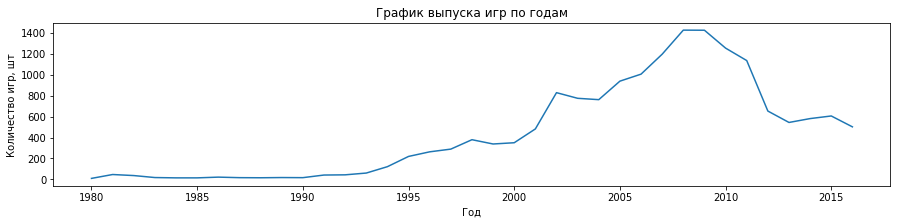

In [12]:
df.groupby('year_of_release')['year_of_release'].count().plot(y='year_of_release', figsize = (15,3));
plt.xlabel('Год');
plt.ylabel('Количество игр, шт');
plt.title('График выпуска игр по годам');

Количесво выпускаемых игр увеличивалось с каждым годом примерно до 2007, потом наблюдается спад. Примерно с 2014 по 2016 года количесво игр в год примерно одинаково.

### Продажи по платформам

,min,max
platform,,
2600,1980,1989
3DO,1994,1995
3DS,2011,2016
DC,1998,2008
DS,1985,2013
GB,1988,2001
GBA,2000,2007
GC,2001,2007
GEN,1990,1994


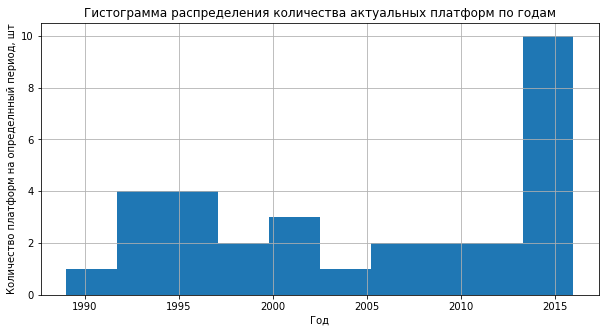

In [13]:
df_year = df.groupby('platform')['year_of_release'].agg(['min', 'max'])
df_year['max'].hist(figsize = (10,5));
plt.xlabel('Год');
plt.ylabel('Количество платформ на определнный период, шт');
plt.title('Гистограмма распределения количества актуальных платформ по годам');
df_year

Из сводной таблицы видно, что не все платофрмы актуальны. Стоит проводить исследование для послених лет 2014-2016 года. В среднем игры на платформы выходят 5-10 десять лет, за исключением PC

platform,3DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,
2014,43.76,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015,27.78,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,5.25,3.60,69.25,NaN,4.25,0.18,4.60,1.52,26.15


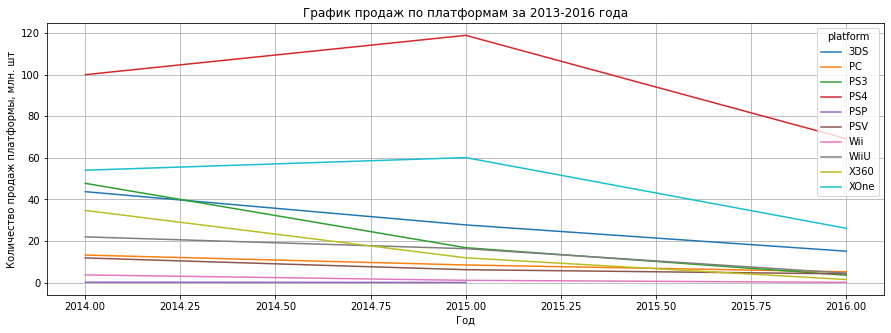

In [14]:
df_actual = df.query("2014 <= year_of_release <= 2016")
df_actual_years = df_actual.pivot_table(
    index='year_of_release',
    columns = 'platform',
    values='sum_sales',
    aggfunc='sum'
)
df_actual_years.plot(grid=True, figsize=(15, 5));
plt.xlabel('Год');
plt.ylabel('Количество продаж платформы, млн. шт');
plt.title('График продаж по платформам за 2013-2016 года');
df_actual_years

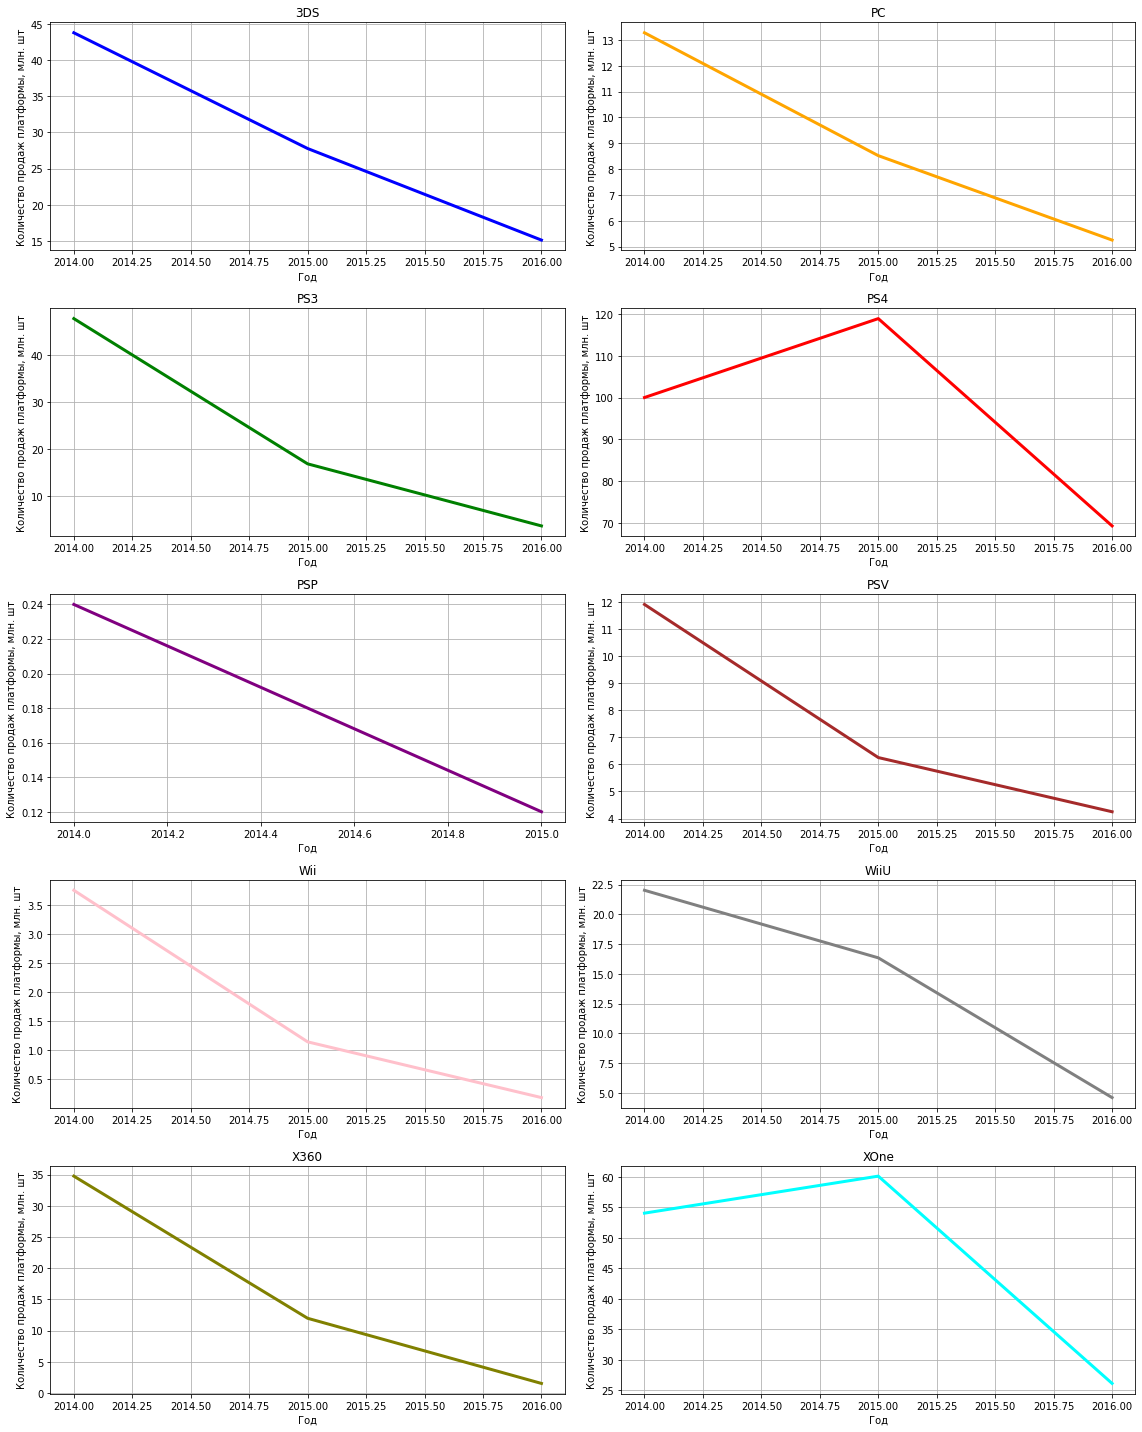

In [15]:
platforms_list = df_actual_years.columns.tolist()
fig, axs = plt.subplots(5, 2, figsize=(16, 20))
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']
count = 0

for row in range(5):
    for col in range(2):        
        df_actual_years[platforms_list[count]].plot(
                grid=True, 
                ax=axs[row, col], 
                color=colors[count],
                linewidth=3
            )
        axs[row, col].set_xlabel('Год')
        axs[row, col].set_ylabel('Количество продаж платформы, млн. шт')
        axs[row, col].set_title(platforms_list[count])
        count += 1

plt.tight_layout()

In [16]:
df_actual.groupby('platform')['sum_sales'].sum().to_frame().sort_values(by='sum_sales', ascending=False)

,sum_sales
platform,
PS4,288.15
XOne,140.36
3DS,86.68
PS3,68.18
X360,48.22
WiiU,42.98
PC,27.05
PSV,22.40
Wii,5.07


Продажи по всем платофрмам падают, но до 2015 года продажи PS4 и XboxOne растут. Самыми перспективными и продаваемыми платформами за 2013-2016 года, являются PS4 и XboxOne

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
PS4,376.0,0.766356,1.614969,0.01,0.0575,0.185,0.6900,14.63
3DS,212.0,0.408868,1.188368,0.01,0.0300,0.090,0.2500,11.68
XOne,228.0,0.615614,1.046513,0.01,0.0500,0.205,0.6325,7.39
WiiU,73.0,0.588767,1.161467,0.01,0.0500,0.190,0.5700,7.09
PS3,219.0,0.311324,0.633059,0.01,0.0400,0.110,0.3250,5.27
X360,111.0,0.434414,0.628967,0.01,0.0700,0.180,0.5050,4.28
PC,151.0,0.179139,0.329359,0.01,0.0200,0.060,0.2000,3.05
Wii,11.0,0.460909,0.625451,0.01,0.0350,0.180,0.7550,2.01
PSV,295.0,0.075932,0.141591,0.01,0.0200,0.040,0.0900,1.96


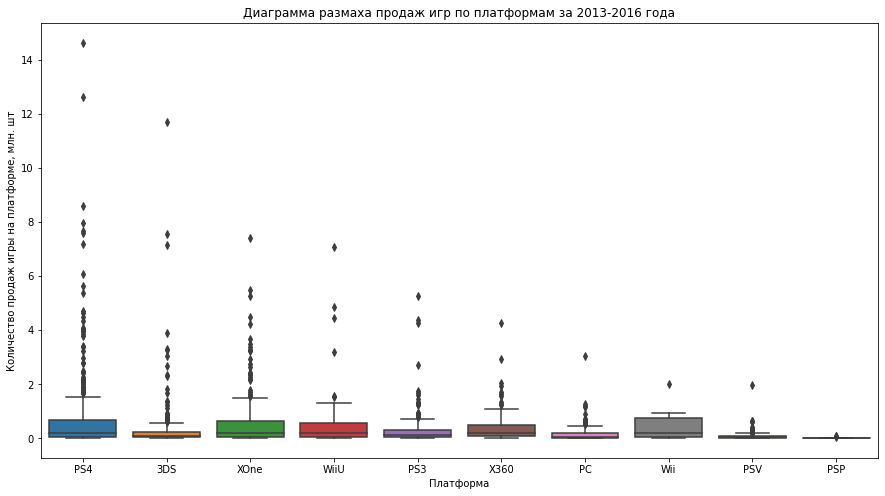

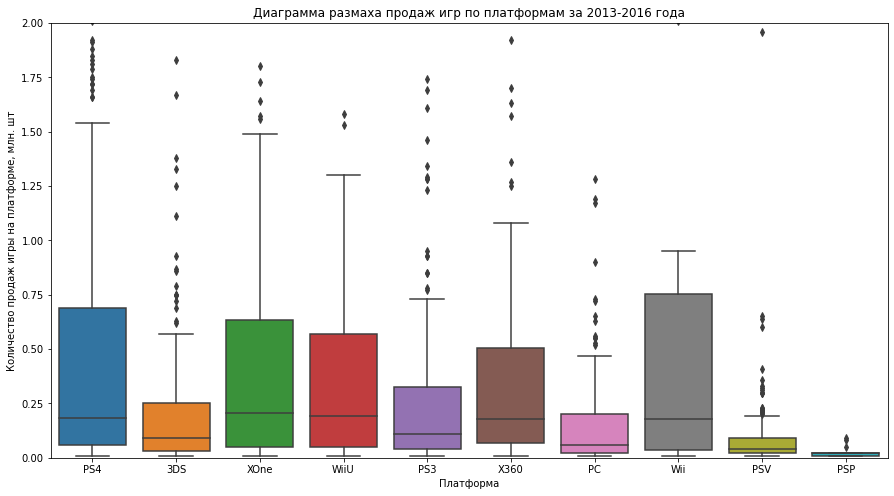

In [17]:
plt.figure(figsize=(15,8));
sns.boxplot(
    data=df_actual,
    x='platform', 
    y='sum_sales'
).set(
    xlabel='Платформа',
    ylabel='Количество продаж игры на платформе, млн. шт',
    title='Диаграмма размаха продаж игр по платформам за 2013-2016 года',
    
);


plt.figure(figsize=(15,8));
sns.boxplot(
    data=df_actual,
    x='platform', 
    y='sum_sales'
).set(
    xlabel='Платформа',
    ylabel='Количество продаж игры на платформе, млн. шт',
    title='Диаграмма размаха продаж игр по платформам за 2013-2016 года',
    
);
plt.ylim(0, 2)
df_actual.groupby('platform')['sum_sales'].describe().sort_values(by='max', ascending=False)

Медианное значние по всем платформам не первышает 0.21 млн продаж игры. Можно говорить, что успешные продажи игры считать более 0.6 млн копий. Провалившимися продажми игры можно считать менее 0.03 млн. копий. Больше всего успешных продаж состоялось на PS4.

### Влияние оценки на продажи игр на PS4

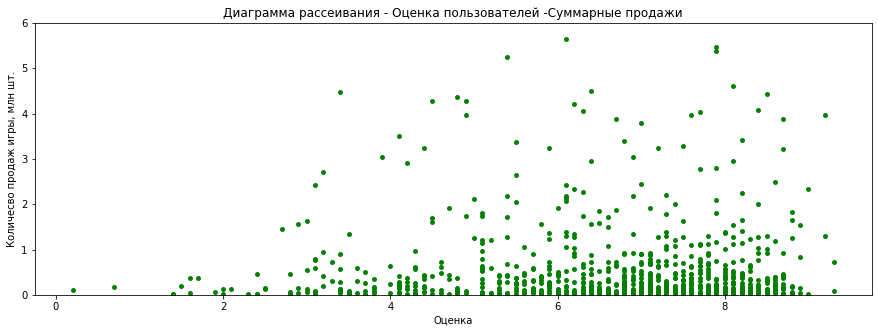

In [18]:
df_actual.plot(x='user_score', y='sum_sales', kind='scatter', figsize=(15,5), c = 'g', s = 15)
plt.ylim(0, 6);
plt.ylabel('Количесво продаж игры, млн шт.');
plt.xlabel('Оценка');
plt.title('Диаграмма рассеивания - Оценка пользователей -Суммарные продажи');

In [19]:
df_actual['sum_sales'].corr(df_actual['user_score'])

-0.013070305002484585

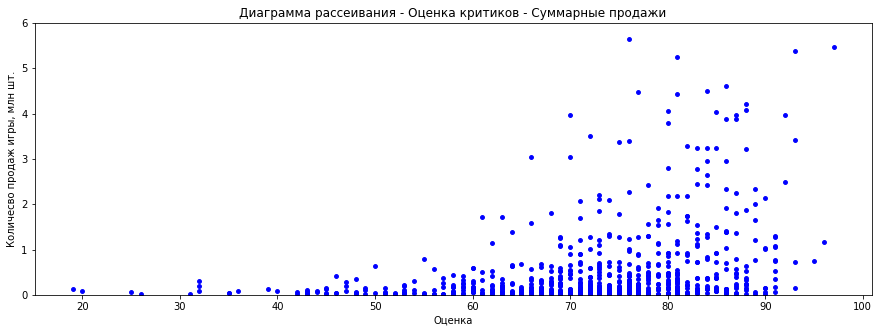

In [20]:
df_actual.plot(x='critic_score', y='sum_sales', kind='scatter', figsize=(15,5), c = 'b', s = 15)
plt.ylim(0, 6);
plt.ylabel('Количесво продаж игры, млн шт.');
plt.xlabel('Оценка');
plt.title('Диаграмма рассеивания - Оценка критиков - Суммарные продажи');

In [21]:
df_actual['sum_sales'].corr(df_actual['critic_score'])

0.328105086966363

Исходя данных графиков и полученного коэфициента корреляции можно сделать вывод:
- оценка пользователей на количесво продаж почти не влияет, на это указывает коэфициент корреляции -0.013
- оценка критиков влияет сильнее на продажи, коэфициент корреляции 0.328 (с увеличением оченки, продажи возрастают)

### Продажи по жанрам

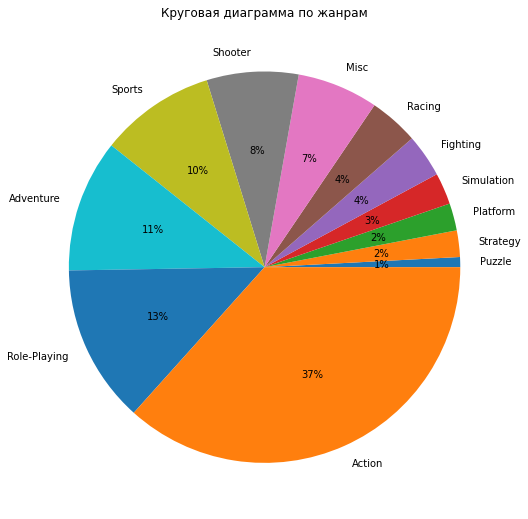

In [22]:
df_actual['genre'].value_counts(ascending = True).plot(kind='pie', autopct='%1.0f%%', figsize = (9,9));
plt.title('Круговая диаграмма по жанрам');
plt.ylabel('');

Больше всего игр выпущенных в жанре:
- Action - 37%
- Role-Plaing - 13%
- Adventure - 11%
- Sport - 10%
- Shooter - 8%

,sum_sales
genre,
Puzzle,2.21
Strategy,3.96
Simulation,13.13
Adventure,17.55
Platform,18.09
Racing,27.52
Fighting,28.22
Misc,37.55
Role-Playing,101.44


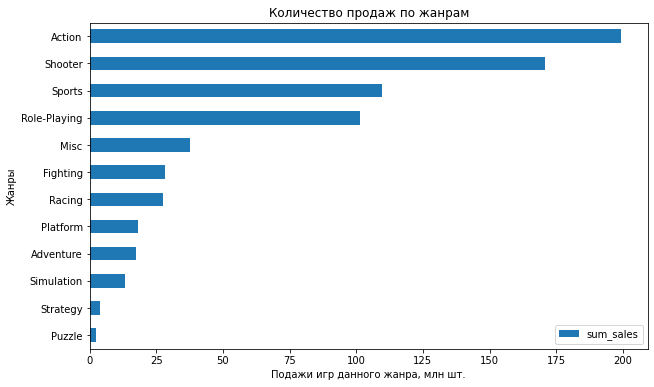

In [23]:
df_actua_genre = df_actual.pivot_table(
    index='genre', 
    values='sum_sales', 
    aggfunc='sum'
).sort_values(by='sum_sales', ascending=True)
df_actua_genre.plot(kind = 'barh', figsize = (10,6));
plt.title('Количество продаж по жанрам');
plt.xlabel('Подажи игр данного жанра, млн шт.');
plt.ylabel('Жанры');
df_actua_genre

Самые продоваемы жанры по абсолютной величине:
- Action - 199.36 млн
- Shooter - 170.94 млн
- Sports - 109.48 млн
- Role-Playing - 101.44 млн

Самый непопулярный жанр это Puzzle

,count,mean,std,min,25%,50%,75%,max
genre,,,,,,,,
Shooter,128.0,1.335469,2.050567,0.01,0.1725,0.515,1.6175,14.63
Sports,161.0,0.680000,1.239736,0.01,0.0600,0.180,0.6400,8.58
Platform,38.0,0.476053,0.722561,0.01,0.0625,0.140,0.4675,3.21
Fighting,60.0,0.470333,1.188053,0.01,0.0600,0.125,0.3200,7.55
Role-Playing,221.0,0.459005,1.177284,0.01,0.0500,0.110,0.3600,11.68
Simulation,44.0,0.298409,0.646925,0.01,0.0200,0.100,0.3275,3.05
Action,619.0,0.322068,0.798181,0.01,0.0300,0.090,0.2800,12.62
Misc,113.0,0.332301,0.736999,0.01,0.0300,0.090,0.3200,5.27
Racing,69.0,0.398841,0.963716,0.01,0.0300,0.090,0.2500,7.09


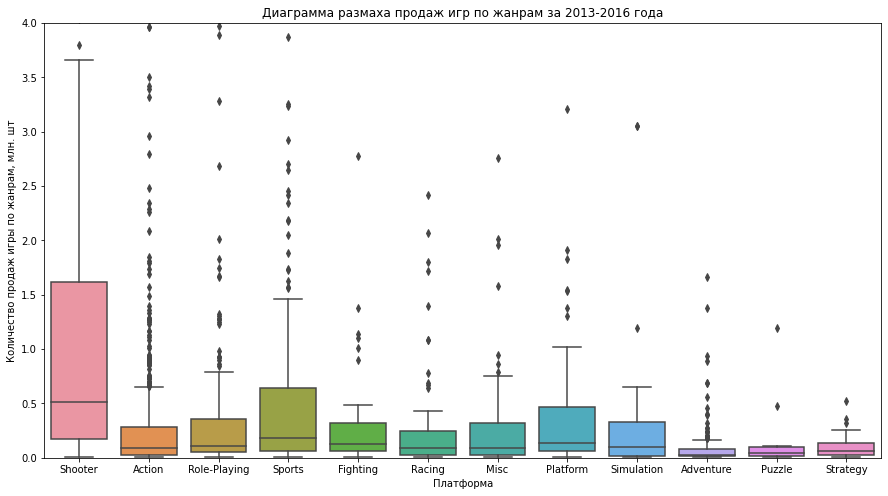

In [40]:
plt.figure(figsize=(15,8));
sns.boxplot(
    data=df_actual,
    x='genre', 
    y='sum_sales'
).set(
    xlabel='Платформа',
    ylabel='Количество продаж игры по жанрам, млн. шт',
    title='Диаграмма размаха продаж игр по жанрам за 2013-2016 года',
    
);
plt.ylim(0, 4)
df_actual.groupby('genre')['sum_sales'].describe().sort_values(by='50%', ascending=False)

В среднем самые продаваемые жанры:

- Shooter
- Platform
- Sports
- Fighting
- Role-Playing

## Портрет пользователя по регионам

### Пользователи Северной Америки

,na_sales
platform,
PS4,98.61
XOne,81.27
X360,28.30
3DS,22.64
PS3,22.05


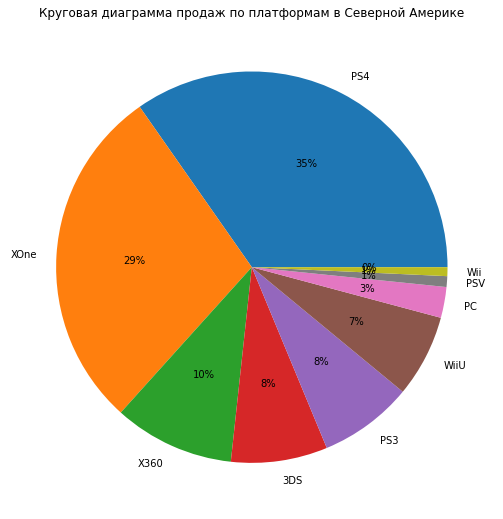

In [25]:
df_actual_na_sales = df_actual.pivot_table(
    index='platform',
    values='na_sales',
    aggfunc='sum'
).sort_values(by='na_sales', ascending=False)
df_actual_na_sales['na_sales'].plot(kind='pie', autopct='%1.0f%%', figsize = (9,9));
plt.title('Круговая диаграмма продаж по платформам в Северной Америке');
plt.ylabel('');
df_actual_na_sales.head(5)

Самые популярные платформы по продажам в Северной Америке это PS4 - 35% и XboxOne - 29%.

,na_sales
genre,
Shooter,79.02
Action,72.53
Sports,46.13
Role-Playing,33.47
Misc,15.05


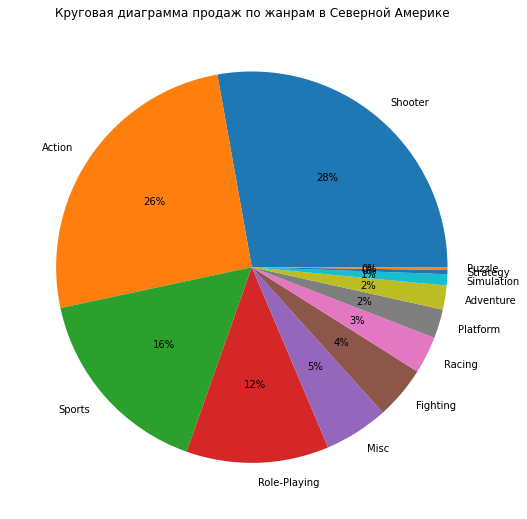

In [26]:
df_actual_na_sales = df_actual.pivot_table(
    index='genre',
    values='na_sales',
    aggfunc='sum'
).sort_values(by='na_sales', ascending=False)
df_actual_na_sales['na_sales'].plot(kind='pie', autopct='%1.0f%%', figsize = (9,9));
plt.title('Круговая диаграмма продаж по жанрам в Северной Америке');
plt.ylabel('');
df_actual_na_sales.head(5)

Самые продаваемые жанры в Северной Америке это Action - 26% и Shooter - 28%

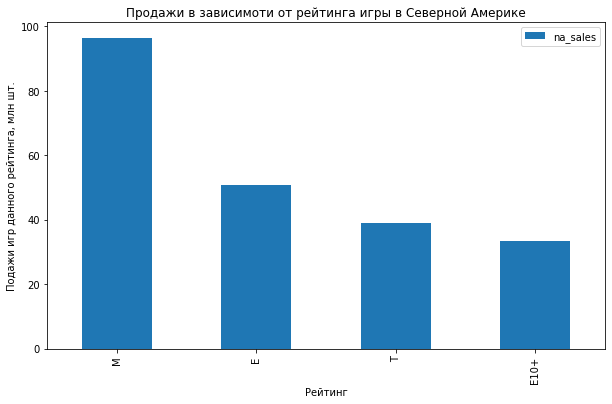

In [27]:
df_actual_na_rating = df_actual.groupby('rating')['na_sales'].sum().to_frame().sort_values(by='na_sales', ascending=False)
df_actual_na_rating.plot(kind = 'bar', figsize = (10,6));
plt.title('Продажи в зависимоти от рейтинга игры в Северной Америке');
plt.ylabel('Подажи игр данного рейтинга, млн шт.');
plt.xlabel('Рейтинг');

Больше всего продаж для игр с рейтингом М.

### Пользователи Европы.

,eu_sales
platform,
PS4,130.04
XOne,46.25
PS3,25.54
PC,17.97
3DS,16.12


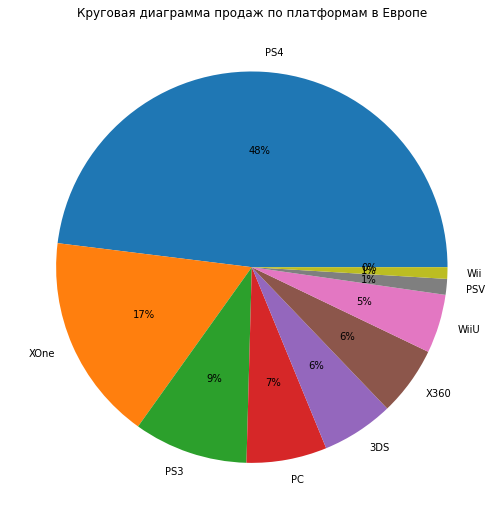

In [28]:
df_actual_na_sales = df_actual.pivot_table(
    index='platform',
    values='eu_sales',
    aggfunc='sum'
).sort_values(by='eu_sales', ascending=False)
df_actual_na_sales['eu_sales'].plot(kind='pie', autopct='%1.0f%%', figsize = (9,9));
plt.title('Круговая диаграмма продаж по платформам в Европе');
plt.ylabel('');
df_actual_na_sales.head(5)

Самые популярные платформы по продажам в Европе это PS4 - 48% и XboxOne - 17%.

,eu_sales
genre,
Action,74.68
Shooter,65.52
Sports,45.73
Role-Playing,28.17
Racing,14.13


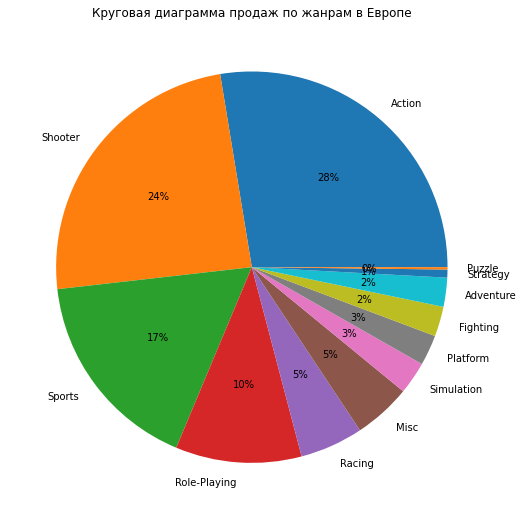

In [29]:
df_actual_na_sales = df_actual.pivot_table(
    index='genre',
    values='eu_sales',
    aggfunc='sum'
).sort_values(by='eu_sales', ascending=False)
df_actual_na_sales['eu_sales'].plot(kind='pie', autopct='%1.0f%%', figsize = (9,9));
plt.title('Круговая диаграмма продаж по жанрам в Европе');
plt.ylabel('');
df_actual_na_sales.head(5)

Самые продаваемые жанры в Европе это Action - 28% и Shooter - 24%

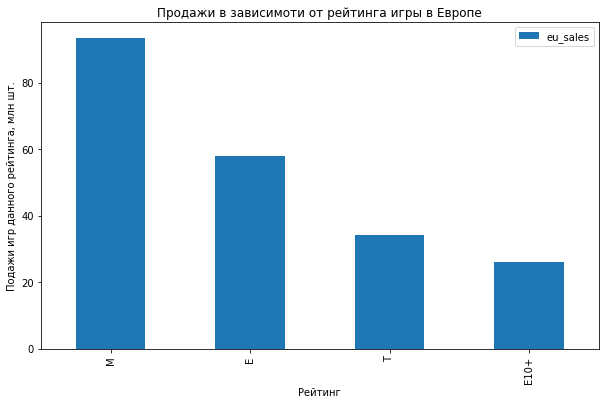

In [30]:
df_actual_eu_rating = df_actual.groupby('rating')['eu_sales'].sum().to_frame().sort_values(by='eu_sales', ascending=False)
df_actual_eu_rating.plot(kind = 'bar', figsize = (10,6));
plt.title('Продажи в зависимоти от рейтинга игры в Европе');
plt.ylabel('Подажи игр данного рейтинга, млн шт.');
plt.xlabel('Рейтинг');

Больше всего продаж для игр с рейтингом М.

### Пользователи Японии.

,jp_sales
platform,
3DS,44.24
PS4,15.02
PSV,14.54
PS3,11.22
WiiU,7.31


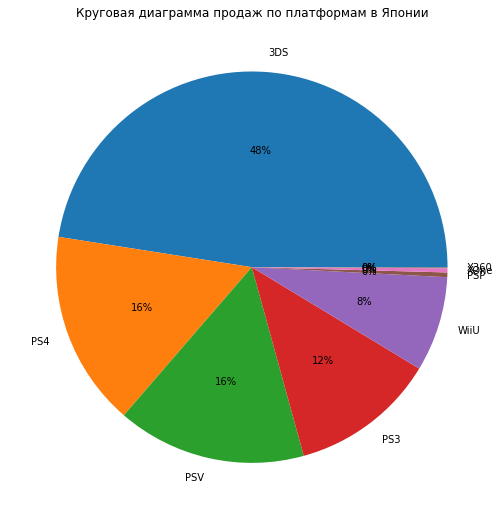

In [31]:
df_actual_na_sales = df_actual.pivot_table(
    index='platform',
    values='jp_sales',
    aggfunc='sum'
).sort_values(by='jp_sales', ascending=False)
df_actual_na_sales['jp_sales'].plot(kind='pie', autopct='%1.0f%%', figsize = (9,9));
plt.title('Круговая диаграмма продаж по платформам в Японии');
plt.ylabel('');
df_actual_na_sales.head(5)

Самые популярные платформы по продажам в Японии это Nintendo 3DS - 48% и PS4 - 17%.

,jp_sales
genre,
Role-Playing,31.16
Action,29.58
Fighting,6.37
Misc,5.61
Shooter,4.87


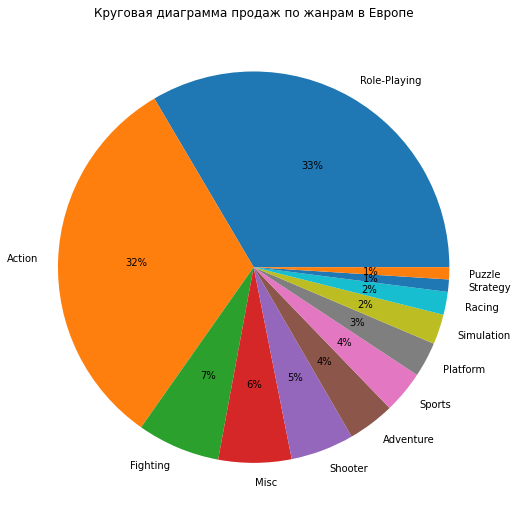

In [32]:
df_actual_na_sales = df_actual.pivot_table(
    index='genre',
    values='jp_sales',
    aggfunc='sum'
).sort_values(by='jp_sales', ascending=False)
df_actual_na_sales['jp_sales'].plot(kind='pie', autopct='%1.0f%%', figsize = (9,9));
plt.title('Круговая диаграмма продаж по жанрам в Европе');
plt.ylabel('');
df_actual_na_sales.head(5)

Самые продаваемые жанры в Японии это Action - 32% и Role-Playng - 24%

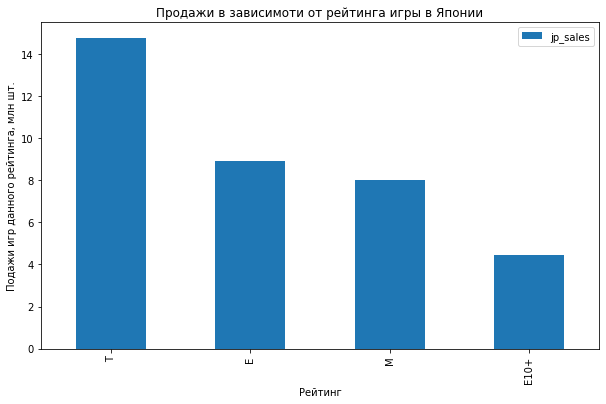

In [33]:
df_actual_jp_rating = df_actual.groupby('rating')['jp_sales'].sum().to_frame().sort_values(by='jp_sales', ascending=False)
df_actual_jp_rating.plot(kind = 'bar', figsize = (10,6));
plt.title('Продажи в зависимоти от рейтинга игры в Японии');
plt.ylabel('Подажи игр данного рейтинга, млн шт.');
plt.xlabel('Рейтинг');

Больше всего продаж для игр с рейтингом Т.

Выводы: 
- в Европе и Америке самые популярные платформы это PS4 и XboxOne, а в Японии Nintendo 3DS и PS. Это связано с тем, что в Японии создавались данные приставки, а в Америке создан XboxOne
- самые популярные жанры в Амирике и Европе это Action и Shooter, а в Японии Action и Role-Playng, возможно это связанно с культурой
- рейтинг в Америке и Европе в основном М, а в Японии Т.

## Проверка гипотез

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Н0: Средние пользовательские рейтинги платформ Xbox One и PC равны

Н1:  Средние пользовательские рейтинги платформ Xbox One и PC разные

In [34]:
xbox_one = df_actual[df_actual['platform'] == 'XOne']['user_score'].dropna()
pc = df_actual[df_actual['platform'] == 'PC']['user_score'].dropna()

alpha = 0.05

results = st.ttest_ind(xbox_one, pc)
print(f'p-value: {results.pvalue}')

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу.')
else:
    print('Не получилось отвергнуть нулевую гипотезу.')

p-value: 0.10450507919348415
Не получилось отвергнуть нулевую гипотезу.


Вывод: Значение p-value равно примерно 10%. Таким образом, не получилось опровергнуть Нулевую гипотезу. То есть, с вероятностью в 10% можно получить различность рейтингов двух платформ

### Средние пользовательские рейтинги жанров Action и Sports разные

Н0: Средние пользовательские рейтинги жанров Action и Sports равны

Н1: Средние пользовательские рейтинги жанров Action и Sports разные

In [35]:
action = df_actual[df_actual['genre'] == 'Action']['user_score'].dropna()
sports = df_actual[df_actual['genre'] == 'Sports']['user_score'].dropna()

alpha = 0.05

results = st.ttest_ind(action, sports)
print(f'p-value: {results.pvalue}')

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу.')
else:
    print('Не получилось отвергнуть нулевую гипотезу.')

p-value: 2.8711147985105864e-19
Отвергаем нулевую гипотезу.


Вывод: Получив p-value, мы отвергли Нулевую гипотезу. Таким образом, у нас практически нет вероятности получить одинакове средние рейнтинги по двум жанрам.

## Общий вывод

- Количесво выпускаемых игр увеличивалось с каждым годом примерно до 2007, потом наблюдается спад. Примерно с 2014 по 2016 года количесво игр в год примерно одинаково
- Не все платофрмы актуальны. Стоит проводить исследование для послених лет 2014-2016 года. В среднем игры на платформы выходят 5-10 десять лет, за исключением PC
- Продажи по всем платофрмам падают, но до 2015 года продажи PS4 и XboxOne растут. Самыми перспективными и продаваемыми платформами за 2013-2016 года, являются PS4 и XboxOne
- Медианное значние по всем платформам не первышает 0.21 млн продаж игры. Можно говорить, что успешные продажи игры считать более 0.6 млн копий. Провалившимися продажми игры можно считать менее 0.03 млн. копий. Больше всего успешных продаж состоялось на PS4
- Исходя из графиков и полученного коэфициента корреляции можно сделать вывод:

    - оценка пользователей на количесво продаж почти не влияет, на это указывает коэфициент корреляции -0.013
    - оценка критиков влияет сильнее на продажи, коэфициент корреляции 0.328 (с увеличением оченки, продажи возрастают)
    
- Самые продоваемы жанры по абсолютной величине:

    - Action - 199.36 млн
    - Shooter - 170.94 млн
    - Sports - 109.48 млн
    - Role-Playing - 101.44 млн

На данные по абслютной виличине не стоит ориентироваться, т.к. на суммарные продажи повлияло количесво игр в жанре.

В среднем самые продаваемые жанры:

- Shooter
- Platform
- Sports
- Fighting
- Role-Playing

Портрет пользователя по регионам:

1) Самые популярные платформы по продажам в Северной Америке это PS4 - 35% и XboxOne - 29%. Самые продаваемые жанры в Северной Америке это Action - 26% и Shooter - 28%. Больше всего продаж для игр с рейтингом М.

2) Самые популярные платформы по продажам в Европе это PS4 - 48% и XboxOne - 17%. Самые продаваемые жанры в Европе это Action - 28% и Shooter - 24%. Больше всего продаж для игр с рейтингом М.

3) Самые популярные платформы по продажам в Японии это Nintendo 3DS - 48% и PS4 - 17%. Самые продаваемые жанры в Японии это Action - 32% и Role-Playng - 24%. Больше всего продаж для игр с рейтингом Т.